# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [26]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
from itertools import product
from sklearn.svm import SVC
import numpy as np

def is_shattered(d, S_n):
    n = len(S_n)
    labels = [-1, 1]  # Possible class labels
    
    # Generate all possible label assignments with 2 classes
    label_assignments = [assignment for assignment in product(labels, repeat=n) if len(set(assignment)) == 2]
    
    # Iterate over all label assignments
    for assignment in label_assignments:
        svm = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        svm.fit(S_n, assignment)
        if not (svm.predict(S_n) == assignment).all():
            # If any assignment is not linearly separable, return False
            return False
    
    # If all assignments are linearly separable, return True
    return True


# Test the function with a simple dataset
d = 2
S_n = np.array([[1, 1], [2, 2], [3, 3]])
result = is_shattered(d, S_n)
print("Is shattered ex. 1:", result)

d = 2
S_n = np.array([[1, 1], [0, 1], [1, 0]])
result = is_shattered(d, S_n)
print("Is shattered ex. 2:", result)

Is shattered ex. 1: False
Is shattered ex. 2: True


### c)

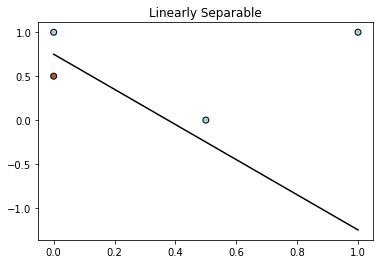

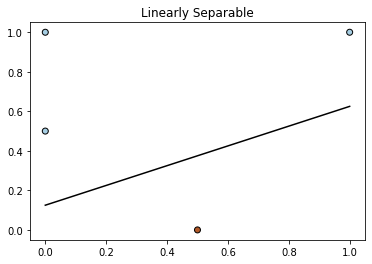

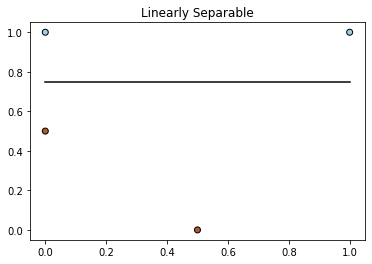

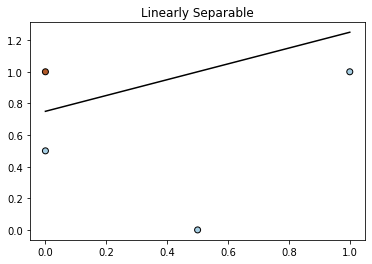

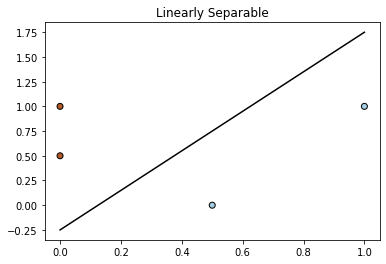

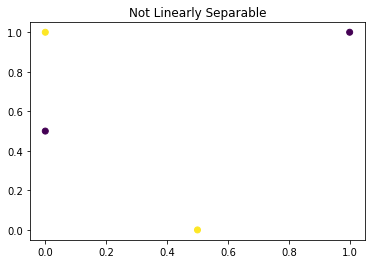

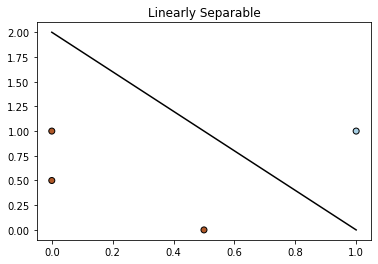

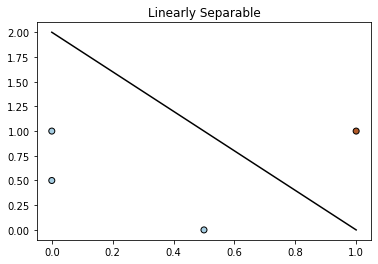

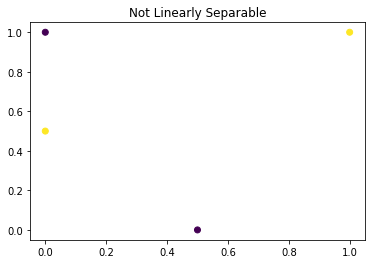

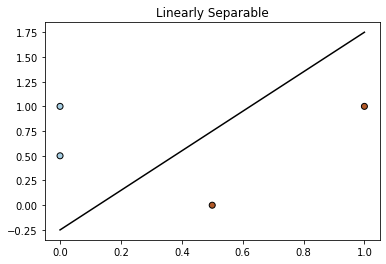

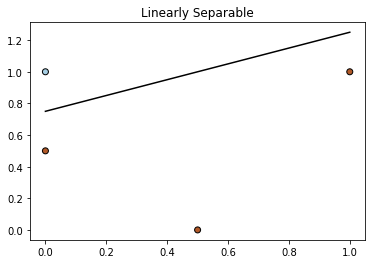

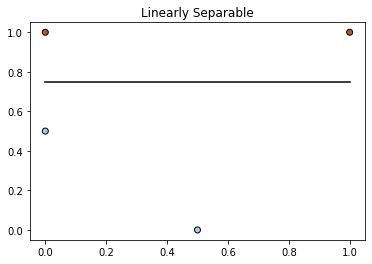

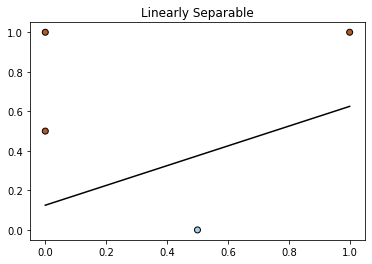

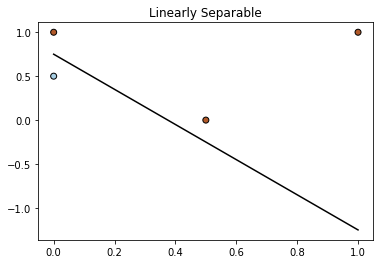

Is shattered: False


In [27]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

import matplotlib.pyplot as plt

def is_shattered_with_plot(d, S_n):
    # If all assignments are linearly separable, return True
    out = True
    
    if d != 2:
        raise ValueError("This function is only defined for d=2.")
    
    n = len(S_n)
    labels = [-1, 1]  # Possible class labels
    
    # Generate all possible label assignments with 2 classes
    label_assignments = [assignment for assignment in product(labels, repeat=n) if len(set(assignment)) == 2]
    
    # Iterate over all label assignments
    for assignment in label_assignments:
        svm = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5)
        svm.fit(S_n, assignment)
        if not (svm.predict(S_n) == assignment).all():
            # If any assignment is not linearly separable, plot and return False
            plt.scatter(S_n[:, 0], S_n[:, 1], c=assignment)
            plt.title("Not Linearly Separable")
            plt.show()
            out = False
        else:
            # If linearly separable, plot SVM decision boundary
            plot_svm_decision_line(S_n, assignment, svm)
    
    return out

def plot_svm_decision_line(X, y, svm_model):
    w = svm_model.coef_[0]
    b = svm_model.intercept_[0]
    xp = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    yp = - (w[0] * xp + b) / w[1]
    plt.plot(xp, yp, 'k-')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    plt.title("Linearly Separable")
    plt.show()


# Test the function with a simple dataset
d = 2
S_n = np.array([[1, 1], [0, 1], [0.5, 0], [0, 0.5]])
result = is_shattered_with_plot(d, S_n)
print("Is shattered:", result)

### d)

In [35]:
def estimate_vc_dimension(d, N=50):
    n_estimate = 2
    
    for i in range(N):
            # Draw n_estimate points from multivariate normal distribution
            S_n = np.random.multivariate_normal(mean=np.zeros(d), cov=np.eye(d), size=n_estimate)
            
            # Check if the set can be shattered
            if is_shattered(d, S_n):
                n_estimate += 1  # Increment n_estimate if the set can be shattered
                i = -1 # Reset index
    
    return n_estimate - 1  # Return final n_estimate as the result
    
# Estimate VC dimension for dimensions ranging from d = 2 to d = 10
max_d = 10
vc_dimensions = {}

for d in range(2, max_d + 1):
    vc_dimension = estimate_vc_dimension(d)
    print(f"VC dimension for d = {d}: {vc_dimension}")
    vc_dimensions[d] = vc_dimension

VC dimension for d = 2: 3
VC dimension for d = 3: 4
VC dimension for d = 4: 5
VC dimension for d = 5: 6
VC dimension for d = 6: 7
VC dimension for d = 7: 8
VC dimension for d = 8: 9
VC dimension for d = 9: 10
VC dimension for d = 10: 11


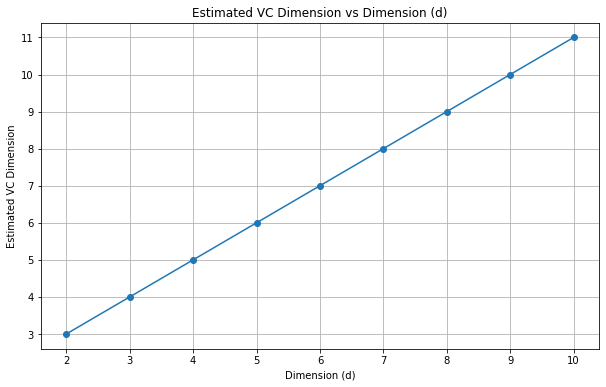

In [36]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(vc_dimensions.keys(), vc_dimensions.values(), marker='o', linestyle='-')
plt.title("Estimated VC Dimension vs Dimension (d)")
plt.xlabel("Dimension (d)")
plt.ylabel("Estimated VC Dimension")
plt.grid(True)
plt.xticks(range(2, max_d + 1))
plt.show()

### e)

In [44]:
def is_shattered_ball(d, S_n):
    n = len(S_n)
    labels = [-1, 1]  # Possible class labels
    
    # Generate all possible combinations of two distinct class labels
    label_combinations = [assignment for assignment in product(labels, repeat=n) if len(set(assignment)) == 2]
    
    # Iterate over all label combinations
    for combination in label_combinations:
        svm = SVC(C=10000, shrinking=False, kernel='rbf', tol=1e-5)
        svm.fit(S_n, combination)
        if not (svm.predict(S_n) == combination).all():
            # If any combination is not linearly separable, return False
            return False
    
    # If all combinations are linearly separable, return True
    return True

def estimate_vc_dimension(d, N=50):
    n_estimate = 2
    
    for i in range(N):
        print(".", end="")
        # Draw n_estimate points from multivariate normal distribution
        S_n = np.random.multivariate_normal(mean=np.zeros(d), cov=np.eye(d), size=n_estimate)
            
        # Check if the set can be shattered
        if is_shattered(d, S_n):
            print("#")
            n_estimate += 1  # Increment n_estimate if the set can be shattered
            i = -1 # Reset index
    
    print()
    return n_estimate - 1  # Return final n_estimate as the result

# Estimate VC dimension for dimensions ranging from d = 2 to d = 5
max_d = 5
vc_dimensions = {}

for d in range(2, max_d + 1):
    vc_dimension = estimate_vc_dimension(d)
    print(f"VC dimension for d = {d}: {vc_dimension}")
    vc_dimensions[d] = vc_dimension

print(vc_dimensions)

.#
.#
................................................
VC dimension for d = 2: 3
.#
.#
.#
...............................................
VC dimension for d = 3: 4
.#
.#
.#
.#
..............................................
VC dimension for d = 4: 5
.#
.#
.#
.#
.#
.............................................
VC dimension for d = 5: 6
{2: 3, 3: 4, 4: 5, 5: 6}
